In [1]:
import numpy as np 
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [2]:
# Importing data
path = 'D:\\Akshata\\Project\\ML project\\train.csv'
data = pd.read_csv(path)
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [3]:
data.shape

(14999, 9)

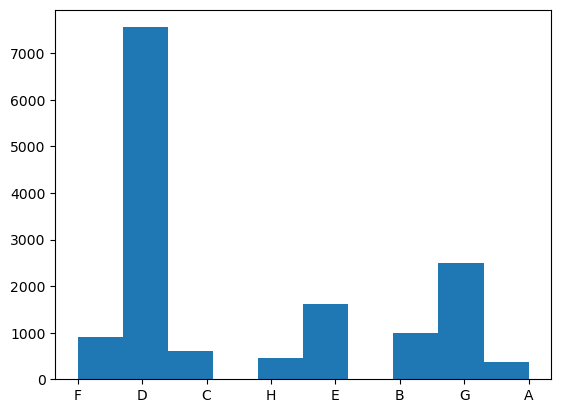

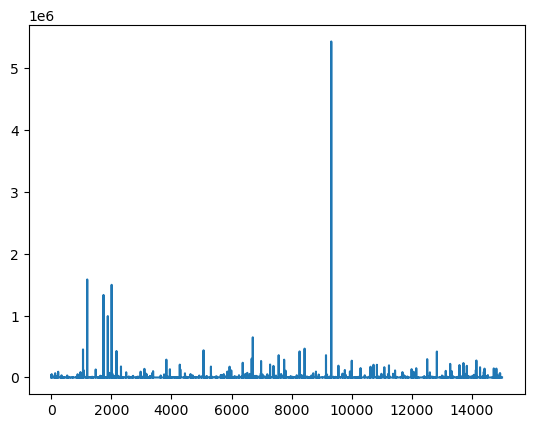

In [4]:
# Visualization
plt.hist(data['category'])
plt.show()
plt.plot(data['adview'])
plt.show()

In [5]:
# Remove videos with adviews greater than 2000000 as outlier
data = data[data['adview'] < 2000000]

C:\Users\AKSHATA\AppData\Local\Temp\ipykernel_21892\2371218163.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


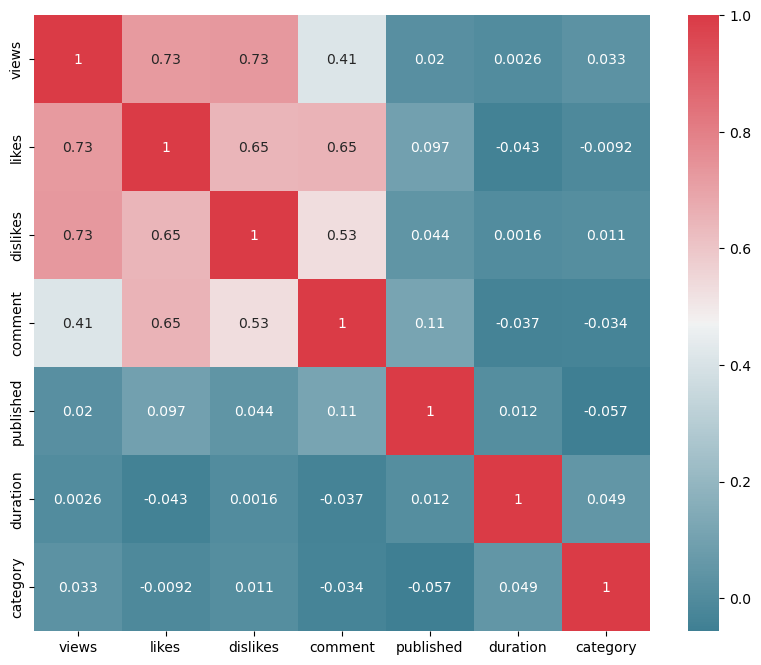

In [23]:
# Heatmap
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()


In [8]:
# Assigning each category a number for category feature
category = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':8}
data['category'] = data['category'].map(category)
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [9]:
# Remove character 'F' present in the data
data = data[data.views != 'F']
data = data[data.likes != 'F']
data = data[data.dislikes != 'F']
data = data[data.comment != 'F']
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [10]:
# Convert values to integers for views, likes, comments, dislikes and adviews.
data['views'] = pd.to_numeric(data['views'])
data['comment'] = pd.to_numeric(data['comment'])
data['likes'] = pd.to_numeric(data['likes'])
data['dislikes'] = pd.to_numeric(data['dislikes'])
data['adview'] = pd.to_numeric(data['adview'])

column_vidid = data['vidid']

# Encoding features like category, duration, vidid
from sklearn.preprocessing import LabelEncoder 
data['duration'] = LabelEncoder().fit_transform(data['duration'])
data['vidid'] = LabelEncoder().fit_transform(data['vidid'])
data['published'] = LabelEncoder().fit_transform(data['published'])

data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9004,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [11]:
# Convert Time_in_sec in duration
import datetime
import time

def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H', 'M', 'S']
    for i in y:
        if i not in P:
            mm += i
        else:
            if(i == 'H'):
                h = mm
                mm = ''
            elif(i == 'M'):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m==''):
        m = '00'
    if(s==''):
        s = '00'
    bp = h + ':' + m + ':' + s
    return bp

train=pd.read_csv(path)
mp = pd.read_csv(path)["duration"]
time = mp.apply(checki)

def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

data["duration"]=time1
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9004,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


In [12]:
# Split data
Y_train = pd.DataFrame(data=data.iloc[:, 1].values, columns=['target'])
data = data.drop(['adview'], axis=1)
data = data.drop(['vidid'], axis=1)
data.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, Y_train, test_size=0.2, random_state=42)
X_train.shape

(11708, 7)

In [14]:
X_test.shape

(2928, 7)

In [15]:
# Normalise the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train.mean()

0.1739096800320488

In [16]:
# Evalution metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Absolute Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
    
# linear regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test, y_test, linear_regression)

Mean Absolute Error: 3707.378005824534
Mean Squared Error: 835663131.1210337
Root Mean Absolute Error: 28907.83857573986


In [17]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train, y_train)
print_error(X_test, y_test, supportvector_regressor)

C:\Users\AKSHATA\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 1696.9438599505638
Mean Squared Error: 833685776.029172
Root Mean Absolute Error: 28873.617300732723


In [18]:
# Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor()
decision_regressor.fit(X_train, y_train)
print_error(X_test, y_test, decision_regressor)

Mean Absolute Error: 2848.6707650273224
Mean Squared Error: 1202310909.6755464
Root Mean Absolute Error: 34674.35521643548


In [19]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split = 15
min_samples_leaf = 2
random_forest = RandomForestRegressor(n_estimators=n_estimators,
                                     max_depth=max_depth,
                                     min_samples_split=min_samples_split,
                                     min_samples_leaf=min_samples_leaf)
random_forest.fit(X_train, y_train)
print_error(X_test, y_test, random_forest)

C:\Users\AKSHATA\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Absolute Error: 3333.5625952887513
Mean Squared Error: 685184483.9025997
Root Mean Absolute Error: 26176.02880313589


In [20]:
# Artificial neural network
import keras
from keras.layers import Dense

ann = keras.models.Sequential([
    Dense(6, activation='relu', 
          input_shape=X_train.shape[1:]),
    Dense(6, activation='relu'), 
    Dense(1)
])

optimizer = keras.optimizers.Adam()
loss = keras.losses.mean_squared_error
ann.compile(optimizer=optimizer, loss=loss, metrics=['mean_squared_error'])
history = ann.fit(X_train, y_train, epochs=100)

C:\Users\AKSHATA\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 688667328.0000 - mean_squared_error: 688667328.0000
Epoch 2/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 748445760.0000 - mean_squared_error: 748445760.0000
Epoch 3/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1039783680.0000 - mean_squared_error: 1039783680.0000
Epoch 4/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 533587392.0000 - mean_squared_error: 533587392.0000
Epoch 5/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 996003904.0000 - mean_squared_error: 996003904.0000  
Epoch 6/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - loss: 578795136.0000 - mean_squared_error: 578795136.0000
Epoch 7/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - loss: 1228967808.0000 - mean_squared_error: 1228967808.0000
Epoch 8/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - loss: 657239104.0000 - mean_squared_error: 657239104.0000
Epoch 9/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - loss: 619893888.0000 - me

In [21]:
ann.summary()
print(X_test, y_test, ann)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 293 (1.15 KB)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 196 (788.00 B)

[[7.17372469e-03 8.63080853e-03 3.31069610e-03 ... 1.54621849e-01
  1.32738468e-02 4.28571429e-01]
 [3.43438476e-06 1.06225336e-05 0.00000000e+00 ... 8.59243697e-01
  3.68717968e-04 5.71428571e-01]
 [4.17243632e-04 7.32954817e-04 1.13186191e-04 ... 5.37394958e-01
  3.31477453e-02 1.42857143e-01]
 ...
 [9.69235691e-04 1.32781670e-04 3.39558574e-04 ... 2.50840336e-01
  1.48593341e-02 5.71428571e-01]
 [7.67152853e-04 3.67008535e-03 5.37634409e-04 ... 8.94117647e-01
  1.32001032e-02 4.28571429e-01]
 [2.63138694e-03 1.20034629e-03 8.20599887e-04 ... 1.61764706e-01
  2.49990782e-02 5.71428571e-01]]        target
4791        5
4800        2
3717        5
8876        1
8288        2
...       ...
3694        1
4872        9
6791        1
750         2
10144      11

[2928 rows x 1 columns] <Sequential name=sequential, built=True>


In [24]:
# saving scikit learn models
import joblib
joblib.dump(decision_regressor, 'decisiontree_youtubeadview.pkl')

# saving keras artificial neural network model
ann.save('ann_youtubeadview.h5')